Water Temperature Data 

In [48]:
import pandas as pd

In [49]:
# Load water temp data

water_temp_data = pd.read_csv('data/water_temperature/all_year_glsea_avg_e_F.csv')

In [50]:
print(water_temp_data.columns)

Index(['Unnamed: 0', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


In [51]:
# Melt the data to reshape it so each year becomes a row with 'day' and 'temperature' columns
water_temp_data = water_temp_data.melt(id_vars=['Unnamed: 0'], 
                                       var_name='year', 
                                       value_name='temperature')

# Rename 'Unnamed: 0' to 'day_of_year' for clarity
water_temp_data.rename(columns={'Unnamed: 0': 'day_of_year'}, inplace=True)

# Convert 'year' and 'day_of_year' to integers if they are not already
water_temp_data['year'] = water_temp_data['year'].astype(int)
water_temp_data['day_of_year'] = water_temp_data['day_of_year'].astype(int)

# Create a 'date' column by combining 'year' and 'day_of_year'
water_temp_data['date'] = pd.to_datetime(water_temp_data['year'].astype(str) + '-' + water_temp_data['day_of_year'].astype(str), format='%Y-%j')

# Now you have a DataFrame with 'date' and 'temperature' columns
# Drop 'year' and 'day_of_year' if they are no longer needed
water_temp_data.drop(columns=['year', 'day_of_year'], inplace=True)

# Display the first few rows to confirm
print(water_temp_data.head())


   temperature       date
0       40.460 1995-01-01
1       40.352 1995-01-02
2       40.244 1995-01-03
3       40.118 1995-01-04
4       39.704 1995-01-05


In [52]:
print(water_temp_data.isna().sum())

temperature    71
date            0
dtype: int64


In [53]:
print(water_temp_data['temperature'].describe())

count    10909.000000
mean        52.709793
std         15.591098
min         32.288000
25%         37.094000
50%         51.170000
75%         68.576000
max         79.610000
Name: temperature, dtype: float64


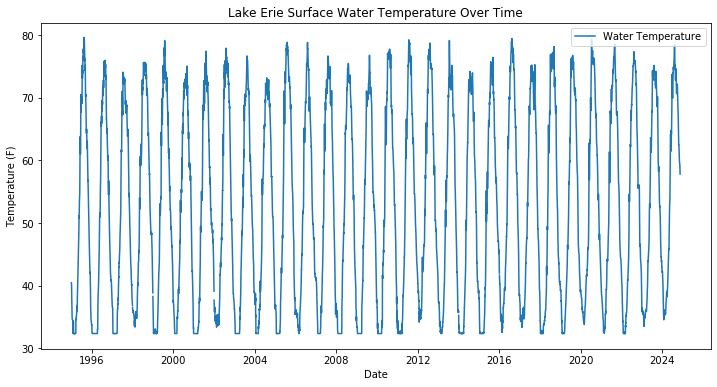

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(water_temp_data['date'], water_temp_data['temperature'], label='Water Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Lake Erie Surface Water Temperature Over Time')
plt.legend()
plt.show()


In [55]:
water_temp_data['temperature'] = water_temp_data['temperature'].interpolate(method='linear')

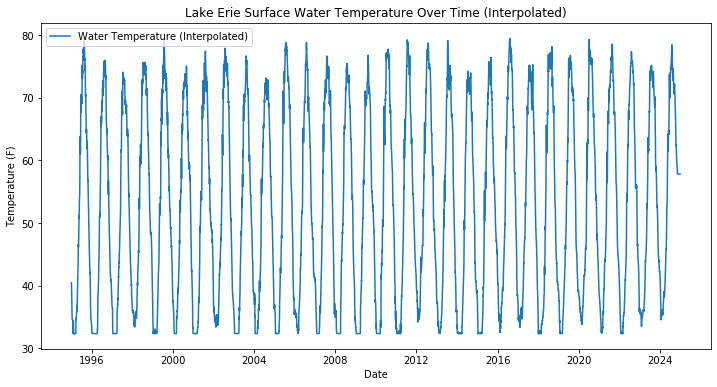

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(water_temp_data['date'], water_temp_data['temperature'], label='Water Temperature (Interpolated)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Lake Erie Surface Water Temperature Over Time (Interpolated)')
plt.legend()
plt.show()

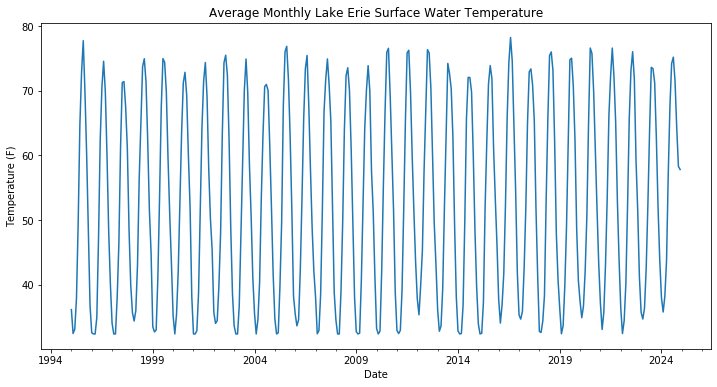

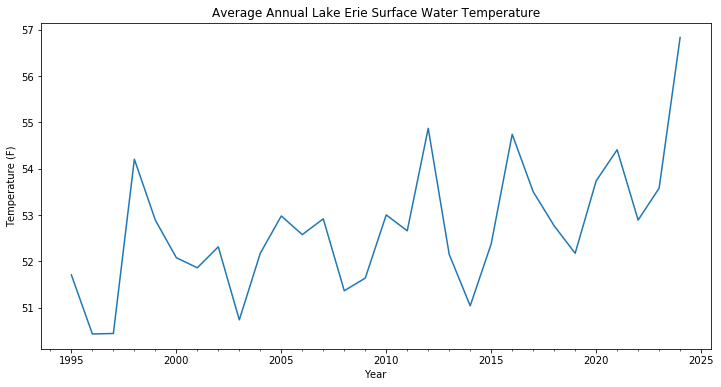

In [57]:
# Calculate monthly and annual averages
monthly_avg_temp = water_temp_data.resample('M', on='date')['temperature'].mean()
annual_avg_temp = water_temp_data.resample('Y', on='date')['temperature'].mean()

# Plot monthly average temperatures
plt.figure(figsize=(12, 6))
monthly_avg_temp.plot(title='Average Monthly Lake Erie Surface Water Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

# Plot annual average temperatures
plt.figure(figsize=(12, 6))
annual_avg_temp.plot(title='Average Annual Lake Erie Surface Water Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.show()

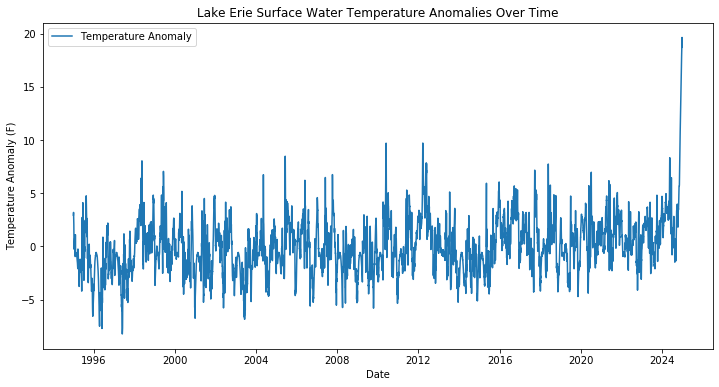

In [58]:
# Calculate long-term daily average
long_term_daily_avg = water_temp_data.groupby(water_temp_data['date'].dt.dayofyear)['temperature'].transform('mean')

# Calculate anomalies
water_temp_data['temperature_anomaly'] = water_temp_data['temperature'] - long_term_daily_avg

# Plot anomalies over time
plt.figure(figsize=(12, 6))
plt.plot(water_temp_data['date'], water_temp_data['temperature_anomaly'], label='Temperature Anomaly')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (F)')
plt.title('Lake Erie Surface Water Temperature Anomalies Over Time')
plt.legend()
plt.show()


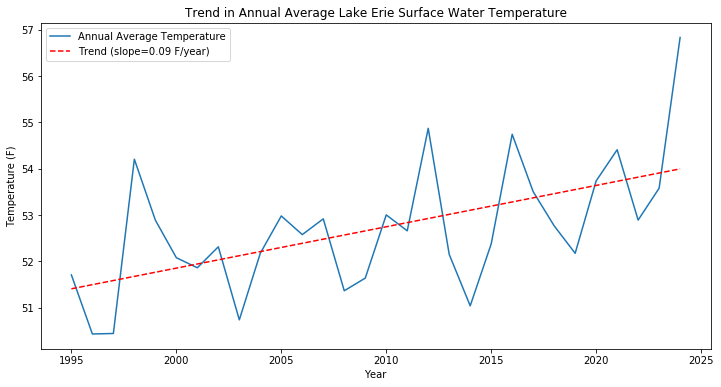

In [59]:
from scipy.stats import linregress

# Get year and average temperature for trend analysis
annual_avg_temp_df = annual_avg_temp.reset_index()
annual_avg_temp_df['year'] = annual_avg_temp_df['date'].dt.year
slope, intercept, r_value, p_value, std_err = linregress(annual_avg_temp_df['year'], annual_avg_temp_df['temperature'])

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp_df['year'], annual_avg_temp_df['temperature'], label='Annual Average Temperature')
plt.plot(annual_avg_temp_df['year'], intercept + slope * annual_avg_temp_df['year'], color='red', linestyle='--', label=f'Trend (slope={slope:.2f} F/year)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Trend in Annual Average Lake Erie Surface Water Temperature')
plt.legend()
plt.show()


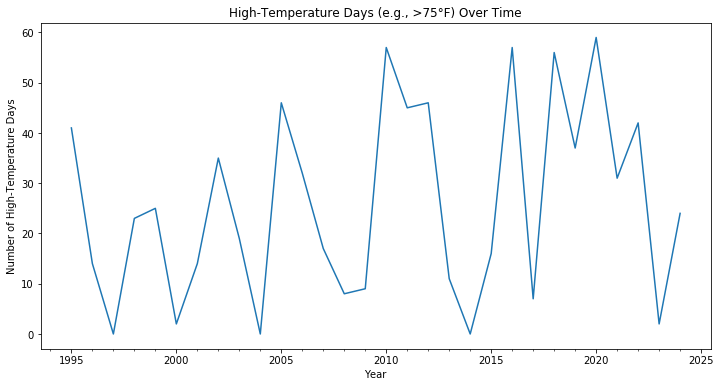

In [60]:
# Define a high-temperature threshold (e.g., 75°F)
high_temp_threshold = 75
high_temp_days = water_temp_data[water_temp_data['temperature'] > high_temp_threshold]

# Count high-temperature events by year
high_temp_counts = high_temp_days.resample('Y', on='date').size()

# Plot high-temperature event counts over time
plt.figure(figsize=(12, 6))
high_temp_counts.plot(title='High-Temperature Days (e.g., >75°F) Over Time')
plt.xlabel('Year')
plt.ylabel('Number of High-Temperature Days')
plt.show()


In [61]:
water_temp_data.to_csv('processed_water_temperature.csv', index=False)

Nutrient Data

In [62]:
# Load nutrient data

nutrient_data = pd.read_csv('data/nutrient_data/All_EOF_StormEventLoadsFormatted.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (51,52,53,57,58,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
# Display the first few rows and column names
print(nutrient_data.head())
print(nutrient_data.columns)

    USGS_Station_Number Field_Name         project  discrete  estimated  \
0  USGS-451021089064901        AO1  DiscoveryFarms         0          1   
1  USGS-451021089064901        AO1  DiscoveryFarms         0          1   
2  USGS-451021089064901        AO1  DiscoveryFarms         0          1   
3  USGS-451021089064901        AO1  DiscoveryFarms         0          0   
4  USGS-451021089064901        AO1  DiscoveryFarms         0          0   

   frozen  storm unique_storm_number       storm_start         storm_end  \
0       1      1              2019-1  12/27/2018 16:51  12/28/2018 18:15   
1       1      1              2019-2    1/7/2019 14:27    1/8/2019 16:45   
2       1      1              2019-3    3/13/2019 0:30    3/16/2019 0:19   
3       1      1              2019-3    3/16/2019 0:19   3/17/2019 22:24   
4       1      1              2019-3   3/17/2019 22:24   3/22/2019 17:32   

                           ...                            \
0                          ...  

In [64]:
nutrient_data['date'] = pd.to_datetime(nutrient_data['storm_start'])

In [65]:
nutrient_data = nutrient_data[['date', 'nitrate_plus_nitrite_conc_mgL', 'orthophosphate_conc_mgL', 'total_phosphorus_unfiltered_conc_mgL']]

In [66]:
nutrient_data.isna().sum()
# Interpolating missing values for simplicity
nutrient_data = nutrient_data.interpolate(method='linear')

In [67]:
# Resample to monthly averages
nutrient_data = nutrient_data.set_index('date').resample('M').mean().reset_index()

In [69]:
# Assuming `temperature_data` is also at monthly frequency
combined_data = pd.merge(water_temp_data, nutrient_data, on='date', how='inner')

In [70]:
nutrient_data['month'] = nutrient_data['date'].dt.month
monthly_avg_nutrient = nutrient_data.groupby('month').mean()

In [71]:
nutrient_data.to_csv('processed_nutrient_data.csv', index=False)

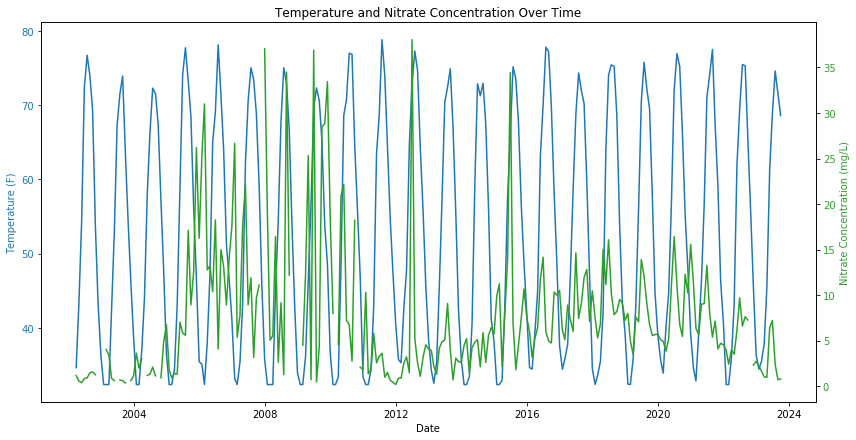

In [72]:
import matplotlib.pyplot as plt

# Example with nitrate concentration and temperature over time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)', color='tab:blue')
ax1.plot(combined_data['date'], combined_data['temperature'], label='Temperature', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Add a second y-axis for the nutrient concentration
ax2 = ax1.twinx()
ax2.set_ylabel('Nitrate Concentration (mg/L)', color='tab:green')
ax2.plot(combined_data['date'], combined_data['nitrate_plus_nitrite_conc_mgL'], label='Nitrate Concentration', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Temperature and Nitrate Concentration Over Time')
plt.show()


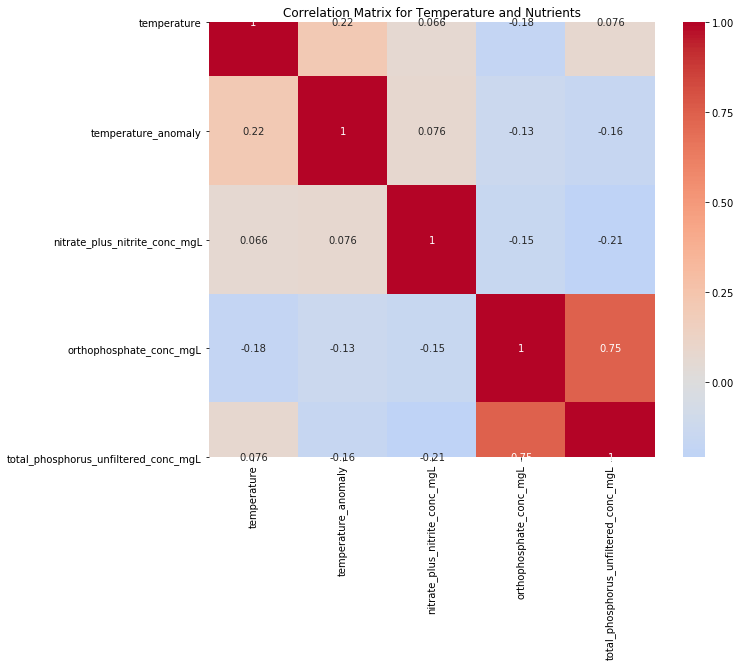

In [73]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = combined_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Temperature and Nutrients')
plt.show()
